# Hands On - CoLoMoTo notebook
- WTAC - Computational Systems Biology for Digital Medicine
- Wellcome Genome Campus, UK
- 7–12 December 2025

Loading a model, computing stable states, checking for phenotype markers, and reachability verification

## Loading & Visualizing the regulatory graph (LRG)

In [31]:
import ginsim

Load the Th model

In [32]:
# We'll use the old/simpler/faster one: http://ginsim.org/sites/default/files/Th_17.zginml
# load() accepts either a local or a remote file
lrg = ginsim.load("https://ginsim.github.io/models/2022-mammal-signalling-prostate-cancer/Montagud2021_Prostate_Cancer.zginml")

/notebook/Montagud2021_Prostate_Cancer.zginml

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:44481)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/py4j/java_gateway.py", line 982, in _get_connection
    connection = self.deque.pop()
                 ^^^^^^^^^^^^^^^^
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/py4j/java_gateway.py", line 1170, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:44481)

Display the regulatory graph, as defined in GINsim.

In [5]:
# node convention: oval -> Boolean, rectangle -> multivalued
ginsim.show(lrg)

---
## Computing stable states

### using bioLQM

In [6]:
import biolqm

bioLQM documentation: http://colomoto.org/biolqm/

In [8]:
### Convert the ginsim model to biolqm
lqm = ginsim.to_biolqm(lrg)

In [9]:
### Compute the stable states
fps_lqm = biolqm.fixpoints(lqm)

In [10]:
from colomoto_jupyter import tabulate
### Display the list of stable states
tabulate(fps_lqm)

,Acidosis,AKT,AMP_ATP,AMPK,Androgen,Apoptosis,AR,ATM,ATR,AXIN1,BAD,Bak,BAX,BCL2,Bcl_XL,beta_catenin,BIRC5,BRCA1,BRCA2,Carcinogen,Caspase8,Caspase9,CDH2,cFLAR,CHK1_2,COX4I2,CyclinB,CyclinD,CytoC,APAF1,DAXX,DNA_Damage,DNA_Repair,Dsh,E2F1,E_cadherin,eEF2,eEF2K,EMT,EP300,ERG,ERK,ETS1,ETV1,EZH2,FADD,FOS,JUN,FOXA1,FOXO,EGF,EGFR,FGF,FGFR3,FRS2,GADD45,GLI,GLUT1,GSH,GSK3,HIF1,HSPs,Hypoxia,IDH1,Invasion,IKK,JNK,Lactic_acid,LDHA,MAP3K1_3,MDM2,MED12,MEK1_2,Metastasis,Migration,ZBTB17,mTORC2,MXI1,MYC,MYC_MAX,NCOA3,NCOR1,NCOR2,NF1,NF_kB,Nutrients,p14ARF,p15,p21,p38,p53,p70S6kab,p90RSK,PDK1,PHDs,PI3K,PIP3,PKC,Proliferation,PTCH1,PTEN,RAF,RAGS,RAS,RB1,Rheb,ROS,RTK,RUNX2,SHH,Slug,SMAD,SMO,Snail,SPOP,TAK1,TCF,TERT,TGFb,TGFBR,fused_event,TNFalpha,TSC1_2,TWIST1,VEGF,VHL,WNT,YWHAZ,AR_ERG,BMP2,Caspase3,NKX3_1,mTORC1
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0
2435,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0
2451,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2443,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0


In [11]:
### Show an overlay of state values (of a given stable state) on the LRG
ginsim.show(lrg, fps_lqm[1])

In [13]:
# =========================
# 2) Definir nodos de interés
# =========================
monitor_genes = ["ATR", "SHH", "MXI1", "RUNX2"]
monitor_pheno = ["Proliferation", "Migration", "Metastasis", "Invasion", "Apoptosis"]

# Incluimos AR en el monitoreo para que quede explícito antes/después
monitor_nodes = ["AR"] + monitor_genes + monitor_pheno


In [15]:
# =========================
# 3) Helpers: fixpoints -> DataFrame + etiquetas
# =========================
def fixpoints_to_df(fps, cols):
    """
    fps: lista de diccionarios (biolqm.fixpoints)
    cols: columnas a extraer
    """
    if not fps:
        return pd.DataFrame(columns=cols)

    rows = []
    for i, fp in enumerate(fps):
        row = {c: fp.get(c, None) for c in cols}
        row["fp_id"] = i
        rows.append(row)
    return pd.DataFrame(rows).set_index("fp_id")

def phenotype_label(row, phenos):
    """
    Etiqueta fenotípica compacta para un atractor dado (fila).
    Para booleanos: ON si >0, OFF si ==0.
    """
    parts = []
    for p in phenos:
        if p not in row or pd.isna(row[p]):
            continue
        status = "ON" if row[p] > 0 else "OFF"
        parts.append(f"{p}:{status}")
    return "|".join(parts)

def summarize_phenotypes(df, phenos):
    """
    Agrega columnas *_active y una columna phenotype_label,
    y devuelve conteos por etiqueta fenotípica.
    """
    if df.empty:
        return df, pd.Series(dtype=int)

    out = df.copy()
    for p in phenos:
        if p in out.columns:
            out[f"{p}_active"] = out[p] > 0

    out["phenotype_label"] = out.apply(lambda r: phenotype_label(r, phenos), axis=1)
    counts = out["phenotype_label"].value_counts()
    return out, counts

# =========================
# 4) WT: puntos fijos
# =========================
fps_wt = biolqm.fixpoints(lqm)
print("\nWT: # fixpoints =", len(fps_wt))
tabulate(fps_wt)


WT: # fixpoints = 2460


,Acidosis,AKT,AMP_ATP,AMPK,Androgen,Apoptosis,AR,ATM,ATR,AXIN1,BAD,Bak,BAX,BCL2,Bcl_XL,beta_catenin,BIRC5,BRCA1,BRCA2,Carcinogen,Caspase8,Caspase9,CDH2,cFLAR,CHK1_2,COX4I2,CyclinB,CyclinD,CytoC,APAF1,DAXX,DNA_Damage,DNA_Repair,Dsh,E2F1,E_cadherin,eEF2,eEF2K,EMT,EP300,ERG,ERK,ETS1,ETV1,EZH2,FADD,FOS,JUN,FOXA1,FOXO,EGF,EGFR,FGF,FGFR3,FRS2,GADD45,GLI,GLUT1,GSH,GSK3,HIF1,HSPs,Hypoxia,IDH1,Invasion,IKK,JNK,Lactic_acid,LDHA,MAP3K1_3,MDM2,MED12,MEK1_2,Metastasis,Migration,ZBTB17,mTORC2,MXI1,MYC,MYC_MAX,NCOA3,NCOR1,NCOR2,NF1,NF_kB,Nutrients,p14ARF,p15,p21,p38,p53,p70S6kab,p90RSK,PDK1,PHDs,PI3K,PIP3,PKC,Proliferation,PTCH1,PTEN,RAF,RAGS,RAS,RB1,Rheb,ROS,RTK,RUNX2,SHH,Slug,SMAD,SMO,Snail,SPOP,TAK1,TCF,TERT,TGFb,TGFBR,fused_event,TNFalpha,TSC1_2,TWIST1,VEGF,VHL,WNT,YWHAZ,AR_ERG,BMP2,Caspase3,NKX3_1,mTORC1
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0
2435,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0
2451,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2443,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0


In [17]:
import pandas as pd 
present = ["ATR", "SHH", "MXI1", "RUNX2", "Proliferation", "Migration", "Metastasis", "Invasion", "Apoptosis"]

# DataFrame solo con nodos presentes de interés
df_wt = fixpoints_to_df(fps_wt, present)

# Resumen fenotípico WT
df_wt_annot, wt_counts = summarize_phenotypes(df_wt, [p for p in monitor_pheno if p in present])
print("\nDistribución de fenotipos (WT):")
print(wt_counts)

# Visualizar un atractor WT sobre el grafo (si hay)
if len(fps_wt) > 0:
    ginsim.show(lrg, fps_wt[0])


Distribución de fenotipos (WT):
phenotype_label
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:OFF|Apoptosis:OFF    764
Proliferation:OFF|Migration:ON|Metastasis:OFF|Invasion:ON|Apoptosis:OFF      608
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:ON|Apoptosis:ON      360
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:ON|Apoptosis:OFF     128
Proliferation:OFF|Migration:ON|Metastasis:ON|Invasion:ON|Apoptosis:OFF       128
Proliferation:ON|Migration:ON|Metastasis:OFF|Invasion:ON|Apoptosis:OFF       128
Proliferation:ON|Migration:ON|Metastasis:ON|Invasion:ON|Apoptosis:OFF        128
Proliferation:ON|Migration:OFF|Metastasis:OFF|Invasion:OFF|Apoptosis:OFF     112
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:OFF|Apoptosis:ON     104
Name: count, dtype: int64


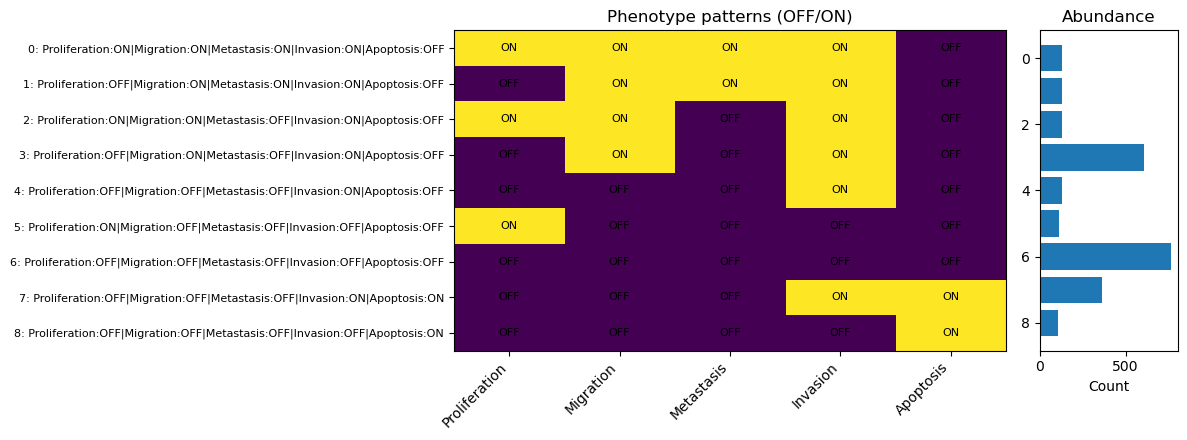

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

phenos = ["Proliferation", "Migration", "Metastasis", "Invasion", "Apoptosis"]

# wt_counts: Series cuyo índice son phenotype_label y valores son counts
# (ya la tienes)

def label_to_row(label, phenos):
    # Convierte "Proliferation:OFF|Migration:ON|..." -> dict {pheno:0/1}
    parts = label.split("|")
    d = {}
    for part in parts:
        k, v = part.split(":")
        if k in phenos:
            d[k] = 1 if v.strip().upper() == "ON" else 0
    # Por seguridad, rellena faltantes
    for p in phenos:
        d.setdefault(p, np.nan)
    return d

# Construir matriz OFF/ON para cada etiqueta
mat = pd.DataFrame([label_to_row(lbl, phenos) for lbl in wt_counts.index], index=wt_counts.index)

# Orden opcional: por conteo desc (ya viene), o por score de "malignidad"
malign_score = mat[["Proliferation","Migration","Metastasis","Invasion"]].sum(axis=1) - mat["Apoptosis"]
mat = mat.assign(malign_score=malign_score, count=wt_counts.values)

# Ordena por (malign_score desc, count desc)
mat = mat.sort_values(["malign_score", "count"], ascending=[False, False])

# Plot heatmap + barra de conteos
M = mat[phenos].to_numpy(dtype=float)
counts = mat["count"].to_numpy()
labels = mat.index.to_list()

fig = plt.figure(figsize=(12, max(4, 0.5*len(mat))))
gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])

# Heatmap
ax0 = fig.add_subplot(gs[0,0])
im = ax0.imshow(M, aspect="auto")  # colores automáticos
ax0.set_yticks(range(len(labels)))
ax0.set_yticklabels([f"{i}: {lbl}" for i, lbl in enumerate(labels)], fontsize=8)
ax0.set_xticks(range(len(phenos)))
ax0.set_xticklabels(phenos, rotation=45, ha="right")
ax0.set_title("Phenotype patterns (OFF/ON)")

# Texto ON/OFF dentro de cada celda
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if np.isnan(M[i, j]): 
            continue
        ax0.text(j, i, "ON" if M[i,j] > 0 else "OFF", ha="center", va="center", fontsize=8)

# Barra de conteos
ax1 = fig.add_subplot(gs[0,1])
ax1.barh(range(len(counts)), counts)
ax1.invert_yaxis()
ax1.set_xlabel("Count")
ax1.set_title("Abundance")

plt.tight_layout()
plt.show()


In [30]:
# =========================
# 5) Mutación: AR=0 (KO)
# =========================
lqm_AR0 = biolqm.perturbation(lqm, "AR=0")
fps_AR0 = biolqm.fixpoints(lqm_AR0)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:44481)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/py4j/java_gateway.py", line 982, in _get_connection
    connection = self.deque.pop()
                 ^^^^^^^^^^^^^^^^
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/py4j/java_gateway.py", line 1170, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:44481)

In [21]:
print("\nAR=0: # fixpoints =", len(fps_AR0))
tabulate(fps_AR0)

df_AR0 = fixpoints_to_df(fps_AR0, present)

# Resumen fenotípico AR=0
df_AR0_annot, ar0_counts = summarize_phenotypes(df_AR0, [p for p in monitor_pheno if p in present])
print("\nDistribución de fenotipos (AR=0):")
print(ar0_counts)

# Visualizar un atractor AR=0 sobre el grafo (si hay)
if len(fps_AR0) > 0:
    ginsim.show(lrg, fps_AR0[0])


AR=0: # fixpoints = 2460

Distribución de fenotipos (AR=0):
phenotype_label
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:OFF|Apoptosis:OFF    764
Proliferation:OFF|Migration:ON|Metastasis:OFF|Invasion:ON|Apoptosis:OFF      608
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:ON|Apoptosis:ON      360
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:ON|Apoptosis:OFF     128
Proliferation:OFF|Migration:ON|Metastasis:ON|Invasion:ON|Apoptosis:OFF       128
Proliferation:ON|Migration:ON|Metastasis:OFF|Invasion:ON|Apoptosis:OFF       128
Proliferation:ON|Migration:ON|Metastasis:ON|Invasion:ON|Apoptosis:OFF        128
Proliferation:ON|Migration:OFF|Metastasis:OFF|Invasion:OFF|Apoptosis:OFF     112
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:OFF|Apoptosis:ON     104
Name: count, dtype: int64


In [25]:
# =========================
# 6) Comparación WT vs AR=0 (en el subespacio monitoreado)
# =========================
def df_state_signature(df, cols):
    """
    Devuelve un DataFrame de firmas únicas (tuplas) en cols.
    Útil para comparar 'qué atractores' (en este subespacio) existen.
    """
    if df.empty:
        return pd.DataFrame(columns=cols)
    return df[cols].drop_duplicates().reset_index(drop=True)

sig_cols = present  # subespacio: AR + genes + fenotipos (presentes)

wt_sig = df_state_signature(df_wt, sig_cols)
ar0_sig = df_state_signature(df_AR0, sig_cols)

# Firmas presentes en WT y no en AR=0
wt_only = wt_sig.merge(ar0_sig, how="outer", indicator=True).query('_merge=="left_only"').drop(columns=["_merge"])
# Firmas presentes en AR=0 y no en WT
ar0_only = ar0_sig.merge(wt_sig, how="outer", indicator=True).query('_merge=="left_only"').drop(columns=["_merge"])
# Firmas compartidas
shared = wt_sig.merge(ar0_sig, how="inner")

print("\n--- Comparación en el subespacio monitoreado ---")
print("Firmas únicas WT:", len(wt_sig))
print("Firmas únicas AR=0:", len(ar0_sig))
print("Compartidas:", len(shared))
print("Solo WT:", len(wt_only))
print("Solo AR=0:", len(ar0_only))

# Mostrar tablas (útil para inspección manual)
print("\nFirmas SOLO WT (desaparecen al mutar AR=0):")
display(wt_only)

print("\nFirmas SOLO AR=0 (aparecen tras mutar AR=0):")
display(ar0_only)

# =========================
# 7) Tabla 'antes vs después' agregada por fenotipo
#    (cómo cambian ATR/SHH/MXI1/RUNX2 condicionados al fenotipo estable)
# =========================
phenos_present = [p for p in monitor_pheno if p in present]
genes_present = [g for g in monitor_genes if g in present]

def mean_profile_by_label(df_annot, genes, phenos_present):
    """
    Promedio (o proporción ON) por phenotype_label para genes y fenotipos.
    En booleanos, el promedio es proporción de 1s.
    """
    if df_annot.empty or "phenotype_label" not in df_annot.columns:
        return pd.DataFrame()

    cols = genes + phenos_present + ["AR"] if "AR" in df_annot.columns else genes + phenos_present
    cols = [c for c in cols if c in df_annot.columns]
    grouped = df_annot.groupby("phenotype_label")[cols].mean()
    grouped["n_fixpoints"] = df_annot.groupby("phenotype_label").size()
    return grouped.sort_values("n_fixpoints", ascending=False)

wt_profile = mean_profile_by_label(df_wt_annot, genes_present, phenos_present)
ar0_profile = mean_profile_by_label(df_AR0_annot, genes_present, phenos_present)

print("\nWT: perfiles promedio por fenotipo (proporción ON si booleano):")
display(wt_profile)

print("\nAR=0: perfiles promedio por fenotipo (proporción ON si booleano):")
display(ar0_profile)


--- Comparación en el subespacio monitoreado ---
Firmas únicas WT: 15
Firmas únicas AR=0: 15
Compartidas: 15
Solo WT: 0
Solo AR=0: 0

Firmas SOLO WT (desaparecen al mutar AR=0):


,ATR,SHH,MXI1,RUNX2,Proliferation,Migration,Metastasis,Invasion,Apoptosis



Firmas SOLO AR=0 (aparecen tras mutar AR=0):


,ATR,SHH,MXI1,RUNX2,Proliferation,Migration,Metastasis,Invasion,Apoptosis



WT: perfiles promedio por fenotipo (proporción ON si booleano):


,ATR,SHH,MXI1,RUNX2,Proliferation,Migration,Metastasis,Invasion,Apoptosis,n_fixpoints
phenotype_label,,,,,,,,,,
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:OFF|Apoptosis:OFF,0.670157,0.329843,0.167539,0.167539,0.0,0.0,0.0,0.0,0.0,764
Proliferation:OFF|Migration:ON|Metastasis:OFF|Invasion:ON|Apoptosis:OFF,0.000000,1.000000,0.605263,1.000000,0.0,1.0,0.0,1.0,0.0,608
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:ON|Apoptosis:ON,1.000000,0.000000,0.511111,1.000000,0.0,0.0,0.0,1.0,1.0,360
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:ON|Apoptosis:OFF,0.000000,1.000000,0.125000,1.000000,0.0,0.0,0.0,1.0,0.0,128
Proliferation:OFF|Migration:ON|Metastasis:ON|Invasion:ON|Apoptosis:OFF,0.000000,1.000000,1.000000,1.000000,0.0,1.0,1.0,1.0,0.0,128
Proliferation:ON|Migration:ON|Metastasis:OFF|Invasion:ON|Apoptosis:OFF,1.000000,0.000000,0.000000,1.000000,1.0,1.0,0.0,1.0,0.0,128
Proliferation:ON|Migration:ON|Metastasis:ON|Invasion:ON|Apoptosis:OFF,1.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,0.0,128
Proliferation:ON|Migration:OFF|Metastasis:OFF|Invasion:OFF|Apoptosis:OFF,0.000000,1.000000,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,112
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:OFF|Apoptosis:ON,1.000000,0.000000,0.538462,1.000000,0.0,0.0,0.0,0.0,1.0,104



AR=0: perfiles promedio por fenotipo (proporción ON si booleano):


,ATR,SHH,MXI1,RUNX2,Proliferation,Migration,Metastasis,Invasion,Apoptosis,n_fixpoints
phenotype_label,,,,,,,,,,
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:OFF|Apoptosis:OFF,0.670157,0.329843,0.167539,0.167539,0.0,0.0,0.0,0.0,0.0,764
Proliferation:OFF|Migration:ON|Metastasis:OFF|Invasion:ON|Apoptosis:OFF,0.000000,1.000000,0.605263,1.000000,0.0,1.0,0.0,1.0,0.0,608
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:ON|Apoptosis:ON,1.000000,0.000000,0.511111,1.000000,0.0,0.0,0.0,1.0,1.0,360
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:ON|Apoptosis:OFF,0.000000,1.000000,0.125000,1.000000,0.0,0.0,0.0,1.0,0.0,128
Proliferation:OFF|Migration:ON|Metastasis:ON|Invasion:ON|Apoptosis:OFF,0.000000,1.000000,1.000000,1.000000,0.0,1.0,1.0,1.0,0.0,128
Proliferation:ON|Migration:ON|Metastasis:OFF|Invasion:ON|Apoptosis:OFF,1.000000,0.000000,0.000000,1.000000,1.0,1.0,0.0,1.0,0.0,128
Proliferation:ON|Migration:ON|Metastasis:ON|Invasion:ON|Apoptosis:OFF,1.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,0.0,128
Proliferation:ON|Migration:OFF|Metastasis:OFF|Invasion:OFF|Apoptosis:OFF,0.000000,1.000000,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,112
Proliferation:OFF|Migration:OFF|Metastasis:OFF|Invasion:OFF|Apoptosis:ON,1.000000,0.000000,0.538462,1.000000,0.0,0.0,0.0,0.0,1.0,104


### Verifying the presence of phenotypes markers
First, define the list of phenotypes to observe

https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000912

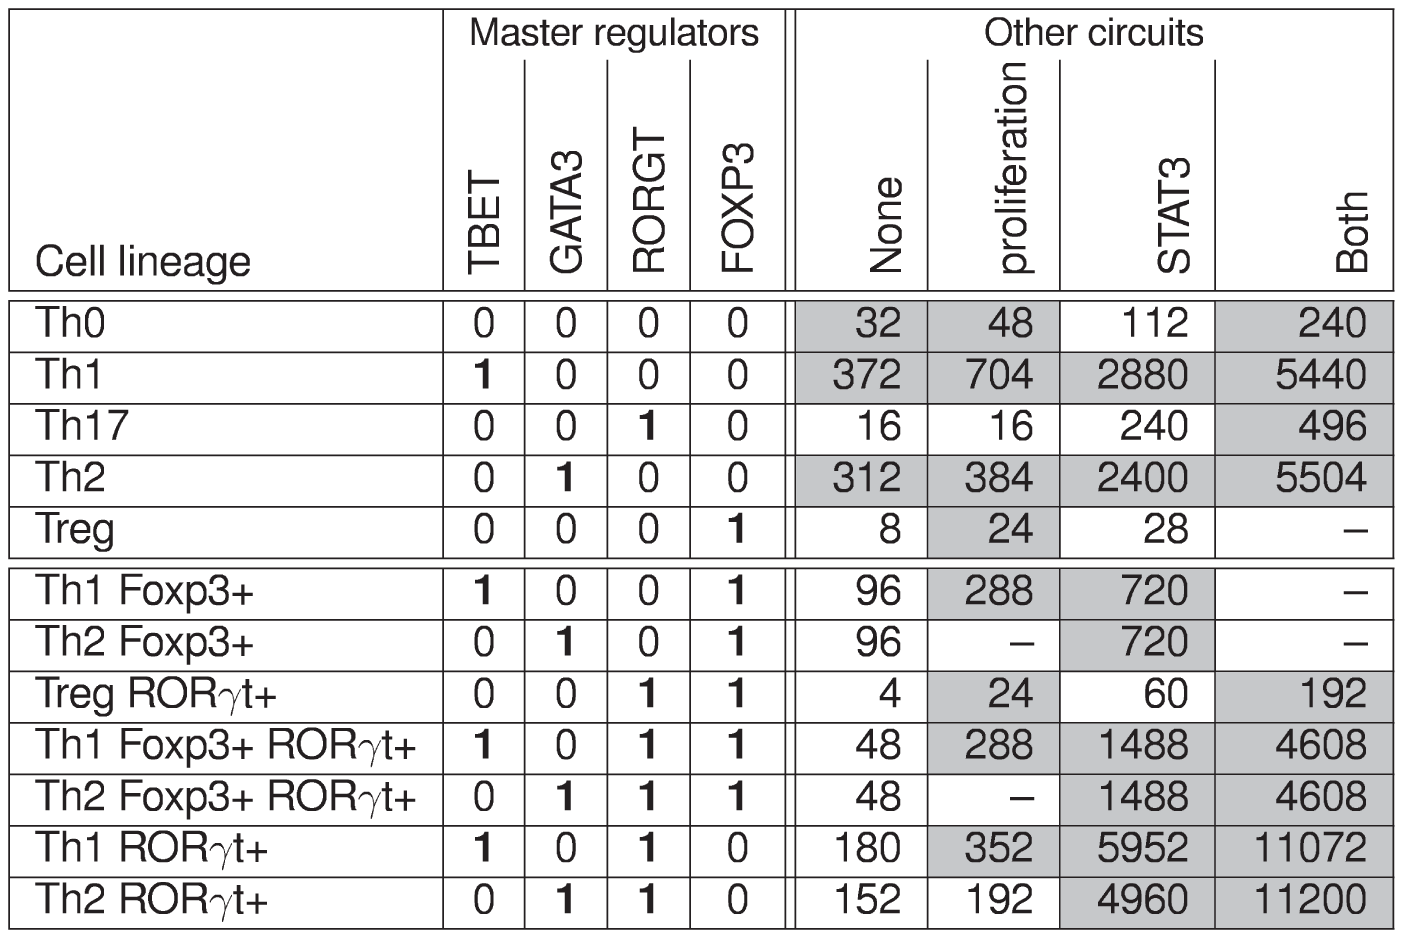

In [19]:
phenotypes = {
    'Th0': {'TBET':0, 'GATA3':0, 'RORGT':0, 'FOXP3': 0},
    'Th1': {'TBET':1, 'GATA3':0, 'RORGT':0, 'FOXP3': 0},
    'Th17': {'TBET':0, 'GATA3':0, 'RORGT':1, 'FOXP3': 0},
    'Th2': {'TBET':0, 'GATA3':1, 'RORGT':0, 'FOXP3': 0},
    'Threg': {'TBET':0, 'GATA3':0, 'RORGT':0, 'FOXP3': 1},
    'Th1_Foxp3': {'TBET':1, 'GATA3':0, 'RORGT':0, 'FOXP3': 1},
    'Th2_Foxp3': {'TBET':0, 'GATA3':1, 'RORGT':0, 'FOXP3': 1},
    'Treg_RORGT': {'TBET':0, 'GATA3':0, 'RORGT':1, 'FOXP3': 1},
    'Th1_Foxp3_RORGT': {'TBET':1, 'GATA3':0, 'RORGT':1, 'FOXP3': 1},
    'Th2_Foxp3_RORGT': {'TBET':0, 'GATA3':1, 'RORGT':1, 'FOXP3': 1},
    'Th1_RORGT': {'TBET':1, 'GATA3':0, 'RORGT':1, 'FOXP3': 0},
    'Th2_RORGT': {'TBET':0, 'GATA3':1, 'RORGT':1, 'FOXP3': 0},
}

Iterate through the set of stable states

In [20]:
for pheno in phenotypes:
    print(pheno, len([fp for fp in fps_pint_Th2010 \
        if all(fp[g]==phenotypes[pheno][g] for g in phenotypes[pheno])]))    

Th0 432
Th1 9396
Th17 768
Th2 8600
Threg 60
Th1_Foxp3 1104
Th2_Foxp3 816
Treg_RORGT 280
Th1_Foxp3_RORGT 6432
Th2_Foxp3_RORGT 6144
Th1_RORGT 17556
Th2_RORGT 16504


---
## Reachability verification
Defining the list of environmental conditions

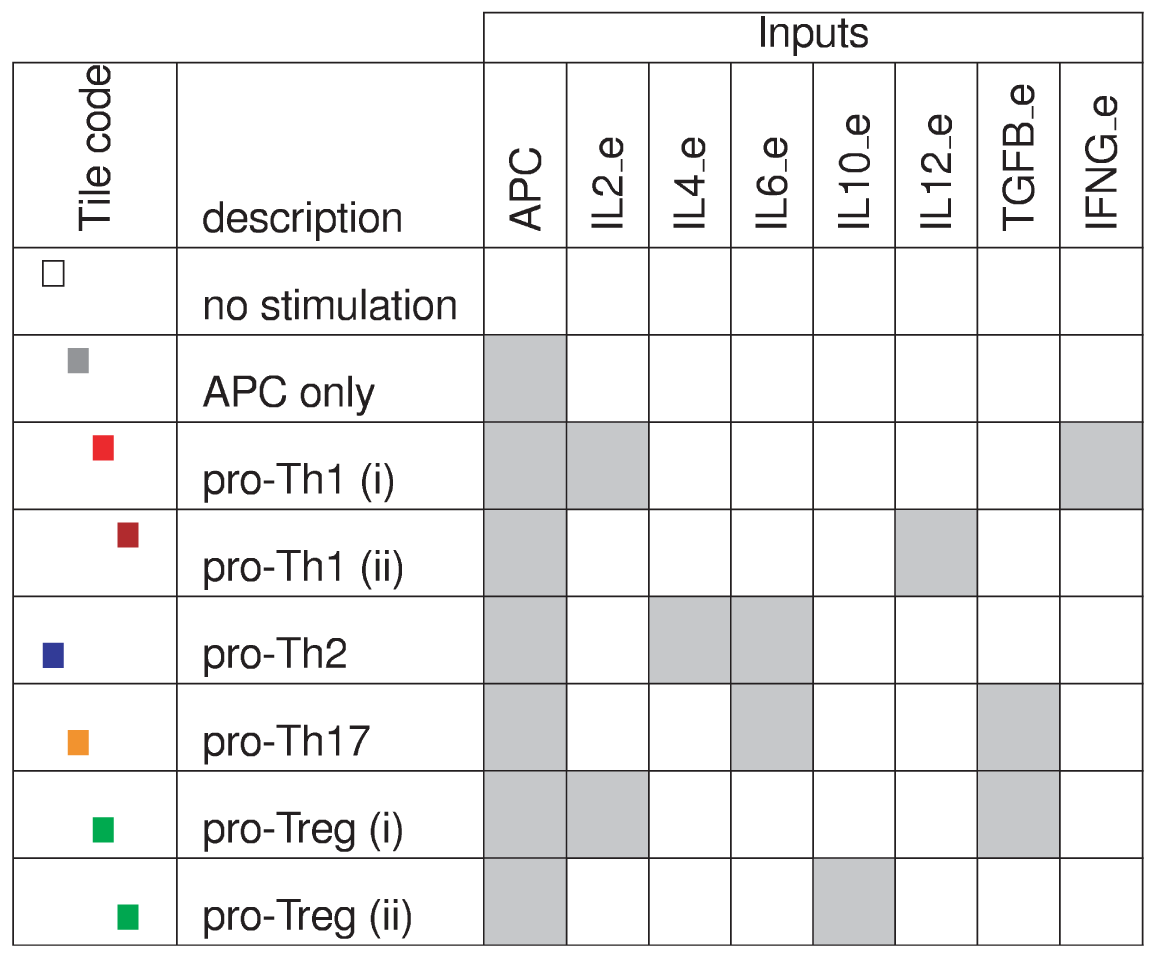

In [21]:
inputs = {
    'nostml':   {'APC':0, 'IL2_e':0, 'IL4_e':0, 'IL6_e':0, 'IL10_e':0, 'IL12_e':0, 'TGFB_e':0, 'IFNG_e':0},
    'APC':      {'APC':1, 'IL2_e':0, 'IL4_e':0, 'IL6_e':0, 'IL10_e':0, 'IL12_e':0, 'TGFB_e':0, 'IFNG_e':0},
    'proTh1_1': {'APC':1, 'IL2_e':1, 'IL4_e':0, 'IL6_e':0, 'IL10_e':0, 'IL12_e':0, 'TGFB_e':0, 'IFNG_e':1},
    'proTh1_2': {'APC':1, 'IL2_e':0, 'IL4_e':0, 'IL6_e':0, 'IL10_e':0, 'IL12_e':1, 'TGFB_e':0, 'IFNG_e':0},
    'proTh2':   {'APC':1, 'IL2_e':0, 'IL4_e':1, 'IL6_e':1, 'IL10_e':0, 'IL12_e':0, 'TGFB_e':0, 'IFNG_e':0},
    'proTh17':  {'APC':1, 'IL2_e':0, 'IL4_e':0, 'IL6_e':1, 'IL10_e':0, 'IL12_e':0, 'TGFB_e':1, 'IFNG_e':0},
    'proTreg_1':{'APC':1, 'IL2_e':1, 'IL4_e':0, 'IL6_e':0, 'IL10_e':0, 'IL12_e':0, 'TGFB_e':1, 'IFNG_e':0},
    'proTreg_2':{'APC':1, 'IL2_e':0, 'IL4_e':0, 'IL6_e':0, 'IL10_e':1, 'IL12_e':0, 'TGFB_e':0, 'IFNG_e':0},
}

### Using BoolSim
Symbolically compute all reachable states from Th0, using a proTh2 environment

In [22]:
import boolsim

In [23]:
init = { **phenotypes['Th0'], **inputs['proTh2']}
Th0_proTh2 = boolsim.reachable(lrg, init)

In [24]:
# Is Th2 in the cone of Th0 reachable states ?
Th0_proTh2_Th2 = [s for s in Th0_proTh2 if s['GATA3']==1]
tabulate(Th0_proTh2_Th2)

,GATA3,IFNb,IFNbR,IFNg_b1,IFNg_b2,IFNgR_b1,IFNgR_b2,IL12,IL12R,IL18,IL18R,IL4,IL4R,IRAK,SOCS1,STAT1_b1,STAT1_b2,STAT4,STAT6,Tbet_b1,Tbet_b2
0,1,*,*,0,0,*,*,*,*,*,*,0,0,*,0,0,1,0,0,0,*
1,1,*,*,0,0,*,*,*,*,*,*,1,*,*,0,0,1,0,0,0,*
3,1,*,*,0,0,*,*,*,*,*,*,*,0,*,1,0,1,0,0,0,*
2,1,*,*,0,0,*,*,*,*,*,*,*,*,*,0,0,1,0,1,0,*
4,1,*,*,0,0,*,*,*,*,*,*,*,*,*,1,0,1,0,1,0,*
5,1,*,*,0,1,0,*,*,*,*,*,0,0,*,0,0,1,0,0,0,*
6,1,*,*,0,1,0,*,*,*,*,*,1,*,*,0,0,1,0,0,0,*
8,1,*,*,0,1,0,*,*,*,*,*,*,0,*,1,0,1,0,0,0,*
7,1,*,*,0,1,0,*,*,*,*,*,*,*,*,0,0,1,0,1,0,*
9,1,*,*,0,1,0,*,*,*,*,*,*,*,*,1,0,1,0,1,0,*


### Using NuSMV model checker

We will CTL to express properties on trajectories related to the reachability of lytic and lysogenic attractors.

The Python module `colomoto.temporal_logics` provides a programmatic way to specify CTL and LTL properties.

In [25]:
from colomoto.temporal_logics import *

States are specified using the `S` operator. The following property characterize the initial state when all the nodes are inactive.

In [26]:
is_Th0_proTh2 = S(
APC=1,
IFNB_e=0,
IFNG_e=0,
IL2_e=0,
IL4_e=1,
IL6_e=0,
IL10_e=0,
IL12_e=0,
IL15_e=0,
IL21_e=0,
IL23_e=0,
IL27_e=0,
TGFB_e=0,
IL2R=0,
IL2RA=0,
IFNG=0,
IL2=0,
IL4=0,
IL10=0,
IL21=0,
IL23=0,
TGFB=0,
TBET=0,
GATA3=0,
FOXP3=0,
NFAT=0,
STAT1=0,
STAT3=0,
STAT4=0,
STAT5=0,
STAT6=0,
proliferation=0,
RORGT=0,
IL17=0)